In [1]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
from numpy import argmax
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# 0 numpy.ndarray image view
def MNIST_show(pixels, label):
    pixels = np.array(pixels, dtype='float64')
    pixels = pixels.reshape((28,28))
    plt.title('Label is {label}'.format(label=label))
    plt.imshow(pixels, cmap='gray')
    plt.show()

In [3]:
# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

train
x = (60000, 28, 28) y = (60000,)


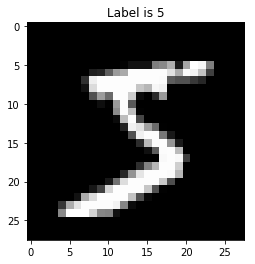

test
x = (10000, 28, 28) y = (10000,)


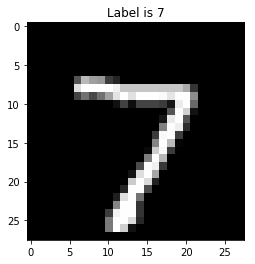

In [4]:
print('train')
print('x =', x_train.shape, 'y =', y_train.shape)
MNIST_show(x_train[0], y_train[0])
print('test')
print('x =', x_test.shape, 'y =', y_test.shape)
MNIST_show(x_test[0], y_test[0])

In [5]:
print(x_train[0])
print(y_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [6]:
# 데이터셋 전처리
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0

train
x = (60000, 784) y = (60000,)


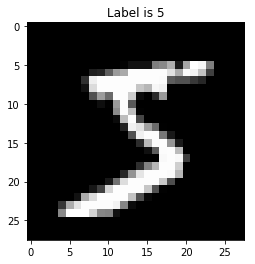

test
x = (10000, 784) y = (10000,)


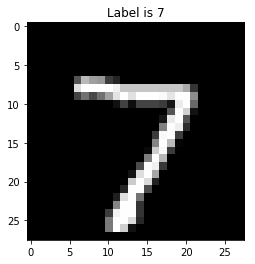

In [7]:
print('train')
print('x =', x_train.shape, 'y =', y_train.shape)
MNIST_show(x_train[0], y_train[0])
print('test')
print('x =', x_test.shape, 'y =', y_test.shape)
MNIST_show(x_test[0], y_test[0])

In [8]:
print(x_train[0])
print(y_train[0])

[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.

In [9]:
# 원핫인코딩 (one-hot encoding) 처리
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [10]:
print(y_train[0])

[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


In [11]:
# 훈련셋과 검증셋 분리
x_val = x_train[:42000] # 훈련셋의 30%를 검증셋으로 사용
x_train = x_train[42000:]
y_val = y_train[:42000] # 훈련셋의 30%를 검증셋으로 사용
y_train = y_train[42000:]

In [12]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [13]:
# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [14]:
# 4. 모델 학습시키기
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_val, y_val))

Train on 18000 samples, validate on 42000 samples
Epoch 1/5
18000/18000 [==============================] - 5s 254us/step - loss: 1.2104 - acc: 0.6865 - val_loss: 0.6716 - val_acc: 0.8386
Epoch 2/5
18000/18000 [==============================] - 4s 242us/step - loss: 0.5259 - acc: 0.8687 - val_loss: 0.4771 - val_acc: 0.8735
Epoch 3/5
18000/18000 [==============================] - 4s 246us/step - loss: 0.4142 - acc: 0.8891 - val_loss: 0.4102 - val_acc: 0.8883
Epoch 4/5
18000/18000 [==============================] - 5s 252us/step - loss: 0.3659 - acc: 0.8981 - val_loss: 0.3771 - val_acc: 0.8950
Epoch 5/5
18000/18000 [==============================] - 4s 245us/step - loss: 0.3370 - acc: 0.9058 - val_loss: 0.3549 - val_acc: 0.9002


In [15]:
# 5. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('')
print('loss_and_metrics : ' + str(loss_and_metrics))

10000/10000 [==============================] - 1s 60us/step

loss_and_metrics : [0.32930060670375821, 0.90620000000000001]


In [16]:
# 6. 모델 사용하기
xhat_idx = np.random.choice(x_test.shape[0], 5)
xhat = x_test[xhat_idx]
yhat = model.predict_classes(xhat)

for i in range(5):
    print('True : ' + str(argmax(y_test[xhat_idx[i]])) + ', Predict : ' + str(yhat[i]))

True : 0, Predict : 0
True : 9, Predict : 9
True : 7, Predict : 7
True : 5, Predict : 5
True : 6, Predict : 6
